# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier, circs

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Restricted Range Info

In [3]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = False, incoherent = False, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(0.001, 0.002)
        p2 = random.uniform(-0.002, -0.001)
        p3 = random.uniform(-0.2, -0.1)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.05680688476562512
Mitigated diff is 0.0130840569525148
1
Noisy diff is 0.06543725585937521
Mitigated diff is 0.01802907247074015
2
Noisy diff is 0.05532519531250002
Mitigated diff is 0.012706413475847
3
Noisy diff is 0.0647565917968751
Mitigated diff is 0.01745947194081965
4
Noisy diff is 0.05812646484374984
Mitigated diff is 0.019318390678902064
5
Noisy diff is 0.0697294921874998
Mitigated diff is 0.017364628047733532
6
Noisy diff is 0.05991015624999996
Mitigated diff is 0.0166637964791283
7
Noisy diff is 0.05614038085937523
Mitigated diff is 0.02289398557826261
8
Noisy diff is 0.062023925781250044
Mitigated diff is 0.019471134052579497
9
Noisy diff is 0.05393530273437497
Mitigated diff is 0.005602261713980372
10
Noisy diff is 0.04896752929687476
Mitigated diff is 0.017642129669375617
11
Noisy diff is 0.0617812499999999
Mitigated diff is 0.01745943056509458
12
Noisy diff is 0.06202270507812502
Mitigated diff is 0.026871770093169767
13
Noisy diff is 0.0677958984375002

Noisy diff is 0.05795678710937491
Mitigated diff is 0.020799210761027087
110
Noisy diff is 0.05171191406249975
Mitigated diff is 0.008703492075415875
111
Noisy diff is 0.057296386718749925
Mitigated diff is 0.012420023776655409
112
Noisy diff is 0.05575463867187502
Mitigated diff is 0.014196830643314895
113
Noisy diff is 0.05974731445312487
Mitigated diff is 0.019420906427448426
114
Noisy diff is 0.05509106445312506
Mitigated diff is 0.014851978931341048
115
Noisy diff is 0.06337060546874995
Mitigated diff is 0.019265774573026917
116
Noisy diff is 0.05460864257812492
Mitigated diff is 0.015443270959725863
117
Noisy diff is 0.05466772460937497
Mitigated diff is 0.01696767679477662
118
Noisy diff is 0.05732275390624997
Mitigated diff is 0.0235078657399459
119
Noisy diff is 0.050534912109374996
Mitigated diff is 0.008233990170693817
120
Noisy diff is 0.054054687499999865
Mitigated diff is 0.00831911236549887
121
Noisy diff is 0.054135742187499725
Mitigated diff is 0.021249252852182154
122

Noisy diff is 0.061056396484374886
Mitigated diff is 0.018430846832651726
217
Noisy diff is 0.05285253906249987
Mitigated diff is 0.013006810539720526
218
Noisy diff is 0.06632421874999994
Mitigated diff is 0.0282687132745727
219
Noisy diff is 0.05903295898437522
Mitigated diff is 0.026160189159798675
220
Noisy diff is 0.06445312499999978
Mitigated diff is 0.0268366205035917
221
Noisy diff is 0.05866918945312494
Mitigated diff is 0.01443524967328691
222
Noisy diff is 0.05679785156250006
Mitigated diff is 0.020901022648141643
223
Noisy diff is 0.06112280273437509
Mitigated diff is 0.012578831070188867
224
Noisy diff is 0.056066406250000034
Mitigated diff is 0.022468943106589645
225
Noisy diff is 0.06159643554687477
Mitigated diff is 0.011865366653854181
226
Noisy diff is 0.055214843749999964
Mitigated diff is 0.014315058379120726
227
Noisy diff is 0.06076733398437506
Mitigated diff is 0.013234164067269516
228
Noisy diff is 0.057168212890625236
Mitigated diff is 0.018905141619448118
229


Noisy diff is 0.06269580078124992
Mitigated diff is 0.022688330417995894
324
Noisy diff is 0.04539868164062488
Mitigated diff is 0.008224851011618739
325
Noisy diff is 0.0589599609375
Mitigated diff is 0.01344116020156072
326
Noisy diff is 0.061380126953125114
Mitigated diff is 0.014312198326847048
327
Noisy diff is 0.0665747070312499
Mitigated diff is 0.02291672225842234
328
Noisy diff is 0.05695605468749987
Mitigated diff is 0.0171698512858669
329
Noisy diff is 0.058473388671874904
Mitigated diff is 0.014870251910442445
330
Noisy diff is 0.06037329101562494
Mitigated diff is 0.01736916763249763
331
Noisy diff is 0.07045019531250007
Mitigated diff is 0.01305120877928534
332
Noisy diff is 0.060230224609375105
Mitigated diff is 0.022856311228918624
333
Noisy diff is 0.05895581054687482
Mitigated diff is 0.016568794409802745
334
Noisy diff is 0.06372412109374981
Mitigated diff is 0.015633942999274897
335
Noisy diff is 0.05863281249999974
Mitigated diff is 0.016761234403616987
336
Noisy d

Noisy diff is 0.06362670898437495
Mitigated diff is 0.02692746286916181
431
Noisy diff is 0.06270776367187503
Mitigated diff is 0.007081188161376817
432
Noisy diff is 0.052891845703124885
Mitigated diff is 0.00896889147636215
433
Noisy diff is 0.06420288085937487
Mitigated diff is 0.013144835881689687
434
Noisy diff is 0.05592138671875002
Mitigated diff is 0.017067700752684045
435
Noisy diff is 0.0659375000000002
Mitigated diff is 0.01979473773377416
436
Noisy diff is 0.054034179687499684
Mitigated diff is 0.011525104656398444
437
Noisy diff is 0.06010058593750012
Mitigated diff is 0.025706809883909942
438
Noisy diff is 0.05459350585937495
Mitigated diff is 0.01881315569196418
439
Noisy diff is 0.05390063476562501
Mitigated diff is 0.01957157845409796
440
Noisy diff is 0.05989282226562498
Mitigated diff is 0.014610402334448436
441
Noisy diff is 0.05515551757812509
Mitigated diff is 0.02198906208266571
442
Noisy diff is 0.06047509765625003
Mitigated diff is 0.029141039174584105
443
Nois

Noisy diff is 0.04946923828125005
Mitigated diff is 0.012636923840048997
538
Noisy diff is 0.0549448242187498
Mitigated diff is 0.01758767826140839
539
Noisy diff is 0.055855712890624964
Mitigated diff is 0.022943173206968703
540
Noisy diff is 0.06329956054687513
Mitigated diff is 0.017227136811756028
541
Noisy diff is 0.0602380371093747
Mitigated diff is 0.009890614387782382
542
Noisy diff is 0.057602294921875075
Mitigated diff is 0.01166104600694462
543
Noisy diff is 0.06111450195312518
Mitigated diff is 0.029742664930555662
544
Noisy diff is 0.059463378906249975
Mitigated diff is 0.020579810521355046
545
Noisy diff is 0.06653124999999993
Mitigated diff is 0.01707937536729931
546
Noisy diff is 0.058279296874999886
Mitigated diff is 0.021376219272264407
547
Noisy diff is 0.058340820312499986
Mitigated diff is 0.021184001326808533
548
Noisy diff is 0.06869409179687502
Mitigated diff is 0.02108666843139484
549
Noisy diff is 0.059527587890624734
Mitigated diff is 0.019489919227907215
550

Noisy diff is 0.06409790039062502
Mitigated diff is 0.021588826527205507
645
Noisy diff is 0.05813598632812478
Mitigated diff is 0.01620252296531577
646
Noisy diff is 0.04473437499999999
Mitigated diff is 0.006683431406917739
647
Noisy diff is 0.05095971679687472
Mitigated diff is 0.010933079295921022
648
Noisy diff is 0.05595776367187488
Mitigated diff is 0.01771051184107364
649
Noisy diff is 0.0605986328125
Mitigated diff is 0.013413791232639083
650
Noisy diff is 0.05587353515625004
Mitigated diff is 0.01796873112821884
651
Noisy diff is 0.050419921874999885
Mitigated diff is 0.013221046770070188
652
Noisy diff is 0.05990063476562513
Mitigated diff is 0.029683143391191935
653
Noisy diff is 0.0610356445312501
Mitigated diff is 0.013353574767246856
654
Noisy diff is 0.061027343750000185
Mitigated diff is 0.015198953322721476
655
Noisy diff is 0.06408715820312505
Mitigated diff is 0.01935557326245796
656
Noisy diff is 0.048246337890625046
Mitigated diff is 0.0199887973734163
657
Noisy d

Noisy diff is 0.06115649414062507
Mitigated diff is 0.014948866937099181
752
Noisy diff is 0.04645141601562486
Mitigated diff is 0.005793810675906563
753
Noisy diff is 0.053217529296875066
Mitigated diff is 0.017566912595867512
754
Noisy diff is 0.05284423828125018
Mitigated diff is 0.019624585706177422
755
Noisy diff is 0.062416992187499964
Mitigated diff is 0.023536440008128157
756
Noisy diff is 0.05606201171875025
Mitigated diff is 0.01912814395890594
757
Noisy diff is 0.050885009765625044
Mitigated diff is 0.009967148270566106
758
Noisy diff is 0.05582934570312492
Mitigated diff is 0.010843773430345927
759
Noisy diff is 0.0458237304687501
Mitigated diff is 0.0059485401576904184
760
Noisy diff is 0.06420874023437517
Mitigated diff is 0.019791601860596142
761
Noisy diff is 0.057252685546875126
Mitigated diff is 0.017444198515243592
762
Noisy diff is 0.0641040039062497
Mitigated diff is 0.017877685129540355
763
Noisy diff is 0.06543896484374967
Mitigated diff is 0.021178010590754637
7

Noisy diff is 0.05374829101562484
Mitigated diff is 0.017296115153292435
859
Noisy diff is 0.0676770019531252
Mitigated diff is 0.02086936789133098
860
Noisy diff is 0.061108154296874995
Mitigated diff is 0.012131377104539487
861
Noisy diff is 0.055982421875000465
Mitigated diff is 0.024339564255189572
862
Noisy diff is 0.05830200195312485
Mitigated diff is 0.02740454727564101
863
Noisy diff is 0.05122607421875003
Mitigated diff is 0.011481635908545229
864
Noisy diff is 0.05608520507812509
Mitigated diff is 0.011497825031955955
865
Noisy diff is 0.05590161132812499
Mitigated diff is 0.02470084057110422
866
Noisy diff is 0.050602783203124835
Mitigated diff is 0.008299212430364689
867
Noisy diff is 0.05952124023437477
Mitigated diff is 0.01960904015983611
868
Noisy diff is 0.05300610351562485
Mitigated diff is 0.01599465570835301
869
Noisy diff is 0.06598779296875001
Mitigated diff is 0.018874335961347466
870
Noisy diff is 0.06606591796874994
Mitigated diff is 0.024972915177992272
871
No

Noisy diff is 0.06364453125000002
Mitigated diff is 0.013183481606284353
966
Noisy diff is 0.06567358398437495
Mitigated diff is 0.019362988841738593
967
Noisy diff is 0.05916967773437509
Mitigated diff is 0.019958010018410466
968
Noisy diff is 0.05907958984374995
Mitigated diff is 0.02088177989545148
969
Noisy diff is 0.05888061523437482
Mitigated diff is 0.005590678657280135
970
Noisy diff is 0.06158447265625
Mitigated diff is 0.02310487428695418
971
Noisy diff is 0.04845117187499981
Mitigated diff is -0.00015499644268435198
972
Noisy diff is 0.05213427734374987
Mitigated diff is 0.013243888972355844
973
Noisy diff is 0.058968505859375187
Mitigated diff is 0.017674923866281445
974
Noisy diff is 0.05166894531249988
Mitigated diff is 0.021095025440234005
975
Noisy diff is 0.06129907226562481
Mitigated diff is 0.023261172041933342
976
Noisy diff is 0.04673559570312502
Mitigated diff is 0.010705400048369285
977
Noisy diff is 0.051223632812499975
Mitigated diff is 0.009849475052941647
978

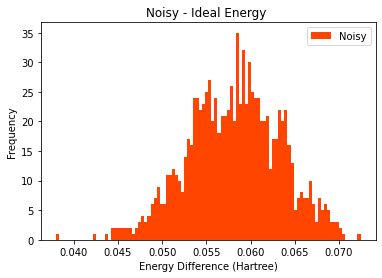

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "orangered", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_restricted.png', dpi = 1000)

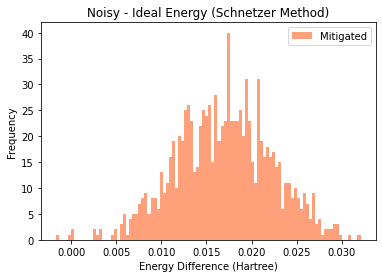

In [9]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "lightsalmon", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_Restricted.png', dpi = 1000)

In [10]:
energies

[[[0.0019517959981706378, -0.001985151016877271, -0.13905291493415645],
  -1.0843851628720436,
  -1.0275782781064184,
  -1.0713011059195288],
 [[0.0011638836776916536, -0.0011596229431024459, -0.10396162850554871],
  -1.1005375066220435,
  -1.0351002507626683,
  -1.0825084341513034],
 [[0.00191450190573325, -0.001881545999706402, -0.11759650118572636],
  -1.0911324773251685,
  -1.0358072820126685,
  -1.0784260638493215],
 [[0.0014778047732638112, -0.001206139359637196, -0.19074408156628425],
  -1.0653580632626685,
  -1.0006014714657934,
  -1.0478985913218488],
 [[0.0010296477587723298, -0.0012747516753699802, -0.1387801155178367],
  -1.0851285710751684,
  -1.0270021062314185,
  -1.0658101803962663],
 [[0.0014679048828097404, -0.0014468548837783595, -0.15647932472860673],
  -1.0797438054501685,
  -1.0100143132626687,
  -1.062379177402435],
 [[0.0016810676965354002, -0.0014879010807051702, -0.1633091467959362],
  -1.0746490788876684,
  -1.0147389226376684,
  -1.05798528240854],
 [[0.0010

In [11]:
diff_r

[0.05680688476562512,
 0.06543725585937521,
 0.05532519531250002,
 0.0647565917968751,
 0.05812646484374984,
 0.0697294921874998,
 0.05991015624999996,
 0.05614038085937523,
 0.062023925781250044,
 0.05393530273437497,
 0.04896752929687476,
 0.0617812499999999,
 0.06202270507812502,
 0.06779589843750022,
 0.05522436523437513,
 0.05677563476562475,
 0.056958496093750144,
 0.05850683593750006,
 0.0632360839843753,
 0.061043945312500014,
 0.059883789062499915,
 0.060067626953125064,
 0.055418457031249924,
 0.06389770507812509,
 0.057469482421874885,
 0.06099804687499999,
 0.06325927734374992,
 0.057046142578125014,
 0.055682373046874956,
 0.061487792968750066,
 0.04801171874999999,
 0.05766137695312512,
 0.053756103515624876,
 0.05157055664062504,
 0.06056738281249974,
 0.048466552734374835,
 0.06821191406250016,
 0.06180493164062506,
 0.05846850585937502,
 0.0558317871093752,
 0.054261718749999854,
 0.058344238281250016,
 0.05928857421875011,
 0.05237890624999997,
 0.06625244140624997,
 

In [12]:
diff_nr

[0.0130840569525148,
 0.01802907247074015,
 0.012706413475847,
 0.01745947194081965,
 0.019318390678902064,
 0.017364628047733532,
 0.0166637964791283,
 0.02289398557826261,
 0.019471134052579497,
 0.005602261713980372,
 0.017642129669375617,
 0.01745943056509458,
 0.026871770093169767,
 0.01315643762162333,
 0.009848721823966011,
 0.01747109180021389,
 0.02516066921359883,
 0.01998497196705218,
 0.015122639437385565,
 0.017881422359107724,
 0.01996297595049379,
 0.020988083249002365,
 0.012066232221554118,
 0.02414759448450865,
 0.005818546781028555,
 0.013367553517198871,
 0.026763664661076714,
 0.013111066933283677,
 0.013861462046075745,
 0.021094801861549994,
 0.011030232181013622,
 0.01730496935437409,
 0.009450847129216289,
 0.019199460267379953,
 0.01539356535933667,
 0.02163932100885213,
 0.023301870433169336,
 0.012505215189541508,
 0.023733402790233393,
 0.014371614344856454,
 0.012665887964705025,
 0.019031077462034807,
 0.012256479235825068,
 0.017021027546718637,
 0.01954

# Without Readout